In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report

import pickle

import warnings 
warnings.filterwarnings('ignore')

In [124]:
zombies=pd.read_csv('zombies.csv')
zombies

,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,NaN
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Zombie,68,Male,Suburban,1,0,Food,No medication,No tools,No first aid supplies,Sanitation,Clothing,Documents
196,197,Zombie,71,Male,Suburban,1,8,No food,No medication,tools,First aid supplies,No sanitation,Clothing,NaN
197,198,Zombie,76,Female,Urban,1,0,No food,No medication,tools,First aid supplies,Sanitation,Clothing,Documents
198,199,Zombie,82,Male,Urban,1,0,No food,No medication,No tools,No first aid supplies,No sanitation,NaN,NaN


In [125]:
zombies.shape

(200, 14)

In [126]:
zombies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zombieid    200 non-null    int64 
 1   zombie      200 non-null    object
 2   age         200 non-null    int64 
 3   sex         200 non-null    object
 4   rurality    200 non-null    object
 5   household   200 non-null    int64 
 6   water       200 non-null    int64 
 7   food        200 non-null    object
 8   medication  200 non-null    object
 9   tools       200 non-null    object
 10  firstaid    200 non-null    object
 11  sanitation  200 non-null    object
 12  clothing    126 non-null    object
 13  documents   66 non-null     object
dtypes: int64(4), object(10)
memory usage: 22.0+ KB


In [127]:
#check for null values
np.sum(zombies.isnull())

zombieid        0
zombie          0
age             0
sex             0
rurality        0
household       0
water           0
food            0
medication      0
tools           0
firstaid        0
sanitation      0
clothing       74
documents     134
dtype: int64

In [128]:
zombies.dtypes

zombieid       int64
zombie        object
age            int64
sex           object
rurality      object
household      int64
water          int64
food          object
medication    object
tools         object
firstaid      object
sanitation    object
clothing      object
documents     object
dtype: object

In [129]:
#convert columns with null values into data type category
for col in['clothing','documents']:
    zombies[col]=zombies[col].astype('category')

In [130]:
#check if conversion successful
dataTypeSeries=zombies.dtypes
print('Data type of each column of timesData Dataframe:')
print(dataTypeSeries)

Data type of each column of timesData Dataframe:
zombieid         int64
zombie          object
age              int64
sex             object
rurality        object
household        int64
water            int64
food            object
medication      object
tools           object
firstaid        object
sanitation      object
clothing      category
documents     category
dtype: object


In [131]:
import pandas as pd
# #add new level and record NA to"No clothing"
# zombies["clothing"]=zombies["clothing"].cat.add_categories("No clothing").fillna("No clothing")
# #add new level and recode NA to "No documents"
# zombies["douments"]=zombies["documents"].cat.add_categories("No documents").fillna("No documents")


In [132]:

le = LabelEncoder()
# Converting categorical columns to numerical using Label Encoding
zombies ['sex'] = le.fit_transform(zombies['sex'])
zombies['rurality']= le.fit_transform(zombies['rurality'])
zombies['food']=le.fit_transform(zombies['food'])
zombies['medication']=le.fit_transform(zombies['medication'])
zombies['tools']=le.fit_transform(zombies['tools'])
zombies['firstaid']=le.fit_transform(zombies['firstaid'])
zombies['sanitation']=le.fit_transform(zombies['sanitation'])
zombies['clothing']=le.fit_transform(zombies['clothing'])
zombies['documents']=le.fit_transform(zombies['documents'])
# zombies['No clothing']=le.fit_transform(zombies['No clothing'])
# zombies['No documents']=le.fit_transform(zombies['No documents'])


In [133]:
zombies.head()

,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,0,0,1,0,0,0,0,0,1,0,1
1,2,Human,18,1,0,3,24,0,0,1,0,1,0,1
2,3,Human,18,1,0,4,16,0,0,0,0,1,0,1
3,4,Human,19,1,0,1,0,0,0,1,1,1,0,1
4,5,Human,19,1,2,1,0,0,0,0,0,1,1,1


In [134]:
print(zombies.describe())

         zombieid         age        sex    rurality   household       water  \
count  200.000000  200.000000  200.00000  200.000000  200.000000  200.000000   
mean   100.500000   44.415000    0.50500    0.780000    2.680000    8.750000   
std     57.879185   17.371865    0.50123    0.845681    1.263162   12.069626   
min      1.000000   18.000000    0.00000    0.000000    1.000000    0.000000   
25%     50.750000   29.000000    0.00000    0.000000    2.000000    0.000000   
50%    100.500000   42.000000    1.00000    1.000000    2.500000    8.000000   
75%    150.250000   58.000000    1.00000    2.000000    4.000000    8.000000   
max    200.000000   85.000000    1.00000    2.000000    6.000000   40.000000   

             food  medication      tools    firstaid  sanitation    clothing  \
count  200.000000  200.000000  200.00000  200.000000  200.000000  200.000000   
mean     0.450000    0.530000    0.49500    0.470000    0.490000    0.370000   
std      0.498742    0.500352    0.5012

In [135]:
#compare categorical Feacures
zombies_factors =zombies.select_dtypes(include='object')
# Write a function to get percent zombies
perc_zombies = [pd.crosstab(zombies_factors[x],zombies['zombie'], normalize='index')
        for x in zombies_factors.columns]
# Print the data
for df in perc_zombies:
    print(df, "\n")

zombie  Human  Zombie
zombie               
Human     1.0     0.0
Zombie    0.0     1.0 



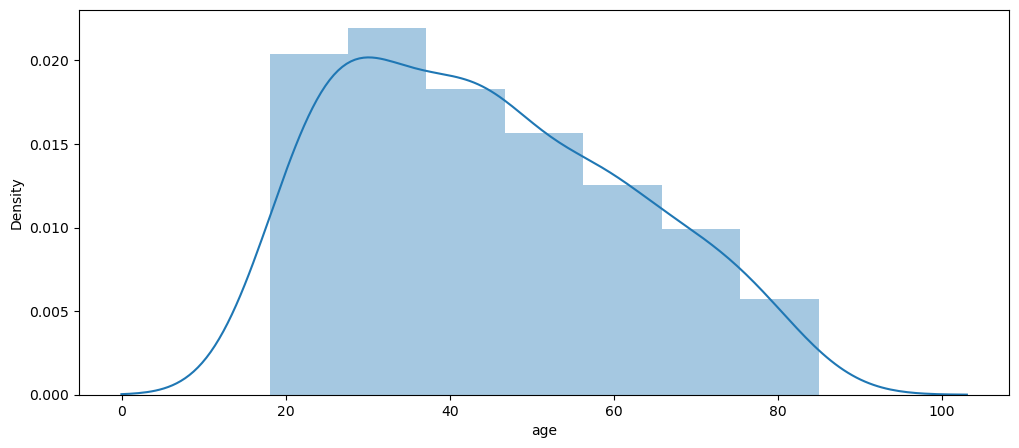

In [136]:
#plotting Age
fig=plt.figure(figsize=(12,5))
sns.distplot(zombies['age'])
plt.show()

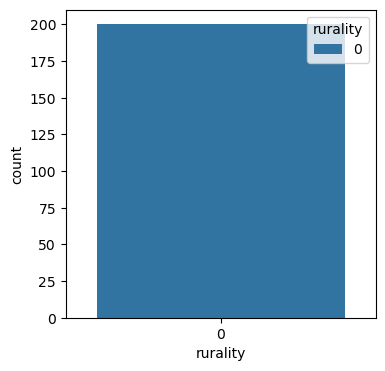

In [137]:
#plotting rurality
fig=plt.figure(figsize=(4,4))
sns.countplot(x=zombies['rurality'],data=zombies['rurality'],hue=zombies['rurality'])
plt.show()

In [138]:
#create water-per-person
zombies['water.person']=zombies['water']/zombies['household']

#Examine the new variable
print(zombies['water.person'].describe())


count    200.000000
mean       3.091833
std        3.627677
min        0.000000
25%        0.000000
50%        2.000000
75%        5.333333
max       13.333333
Name: water.person, dtype: float64


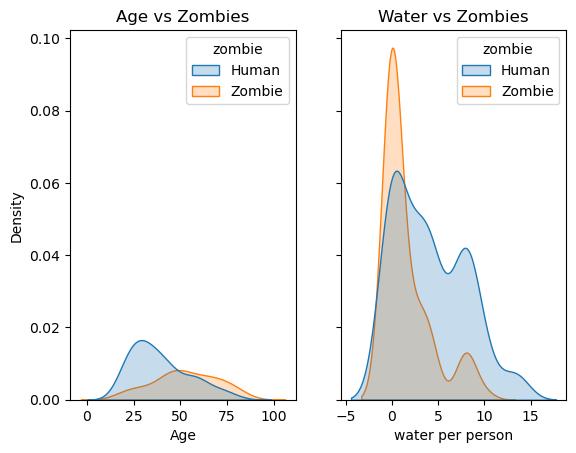

In [139]:
#create the ageZombies graph
f,(ageZombies,waterPersonZom)=plt.subplots(1,2, sharey=True)
ageZombies=sns.kdeplot(data=zombies,x="age",fill=True,hue="zombie",ax=ageZombies)
ageZombies.set(title="Age vs Zombies",xlabel="Age",ylabel="Density")
#create the waterPersonZom graph
waterPersonZom=sns.kdeplot(data=zombies,x="water.person",fill=True,hue="zombie",ax=waterPersonZom)
waterPersonZom.set(title="Water vs Zombies",xlabel="water per person",ylabel="Density")
plt.show()

<Axes: >

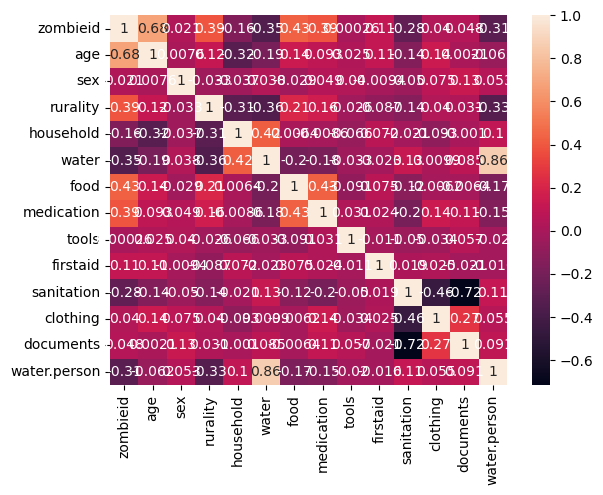

In [140]:
sns.heatmap(zombies.corr(),annot=True)

In [141]:
#Splitting data into features and target
X=zombies.drop(['zombie','water.person','zombieid'],axis=1)
y=zombies['zombie']           
            
            
            

In [142]:
#Features
X

,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,18,0,0,1,0,0,0,0,0,1,0,1
1,18,1,0,3,24,0,0,1,0,1,0,1
2,18,1,0,4,16,0,0,0,0,1,0,1
3,19,1,0,1,0,0,0,1,1,1,0,1
4,19,1,2,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,68,1,1,1,0,0,1,0,1,1,0,0
196,71,1,1,1,8,1,1,1,0,0,0,1
197,76,0,2,1,0,1,1,1,0,1,0,0
198,82,1,2,1,0,1,1,0,1,0,1,1


In [143]:
#Target Variable
y

0       Human
1       Human
2       Human
3       Human
4       Human
        ...  
195    Zombie
196    Zombie
197    Zombie
198    Zombie
199    Zombie
Name: zombie, Length: 200, dtype: object

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [145]:
#Defining the models
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()



In [146]:
# Training and predicting with each model
for model in [lr,dt,rf,svm]:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #Evaluating the model
    acc_score = accuracy_score(y_test, y_pred)
    clf_report = classification_report (y_test, y_pred)

    model_name =  type(model).__name__ #get the name of the model

    print(f'Model: {model_name}')
    print(f'Accuracy score: {acc_score: 2f}')
    print(f'Classification report:\n{clf_report}\n')

Model: LogisticRegression
Accuracy score:  0.975000
Classification report:
              precision    recall  f1-score   support

       Human       1.00      0.96      0.98        26
      Zombie       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


Model: DecisionTreeClassifier
Accuracy score:  0.825000
Classification report:
              precision    recall  f1-score   support

       Human       0.95      0.77      0.85        26
      Zombie       0.68      0.93      0.79        14

    accuracy                           0.82        40
   macro avg       0.82      0.85      0.82        40
weighted avg       0.86      0.82      0.83        40




Model: RandomForestClassifier
Accuracy score:  0.950000
Classification report:
              precision    recall  f1-score   support

       Human       1.00      0.92      0.96        26
      Zombie       0.88      1.00      0.93        14

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40


Model: SVC
Accuracy score:  0.800000
Classification report:
              precision    recall  f1-score   support

       Human       0.82      0.88      0.85        26
      Zombie       0.75      0.64      0.69        14

    accuracy                           0.80        40
   macro avg       0.79      0.76      0.77        40
weighted avg       0.80      0.80      0.80        40




In [147]:
y_pred=lr.predict([[18,0,0,1,0,0,0,0,0,1,0,1]])
print(y_pred)

['Human']


In [148]:
#Training and predicting with each model
for model in[lr,dt,rf,svm]:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    #Evaluating the model
    acc_score=accuracy_score(y_test,y_pred)
    clf_report=classification_report(y_test,y_pred)

    print(f'Model:{type(model).__name__}')
    print(f'Accracy score:{acc_score:.2f}')
    print(f'Classification report:\n{clf_report}\n')

Model:LogisticRegression
Accracy score:0.97
Classification report:
              precision    recall  f1-score   support

       Human       1.00      0.96      0.98        26
      Zombie       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


Model:DecisionTreeClassifier
Accracy score:0.85
Classification report:
              precision    recall  f1-score   support

       Human       0.95      0.81      0.88        26
      Zombie       0.72      0.93      0.81        14

    accuracy                           0.85        40
   macro avg       0.84      0.87      0.84        40
weighted avg       0.87      0.85      0.85        40


Model:RandomForestClassifier
Accracy score:0.93
Classification report:
              precision    recall  f1-score   support

       Human       1.00      0.88      0.94        26
      Zombie       0.82   

In [149]:
filename='model.pkl'
pickle.dump(lr,open(filename,'wb'))